# Exercise 1a

## 1. Monte-Carlo Simulation

### 1.1 Data Creation and Visualization
#### Method
- Let X be a random variable whose distribution can be described by the cumulative distribution function $F_{x}$.
- We want to generate values of X which are distributed according to this distribution.

The inverse transform sampling method works as follows:

1. Generate a random number u from the standard uniform distribution in the interval $[0,1]$.
2. Find the inverse of the desired CDF, e.g. $F^{-1}_{X}(x)$.
3. Compute $X = F^{-1}_{X}(u)$. The computed random variable $X$ has distribution $F_{X}(x)$.
---
Information taken from [Wikipedia](https://en.wikipedia.org/wiki/Inverse_transform_sampling)

#### Application
Sampling $p(Y=0) = p(Y=1) = \frac{1}{2}$
1. Generate a random number u from the standard uniform distribution in the interval $[0,1]$.
2. Round random number to 1 if it is $\geq$ 0.5, otherwise round it to 0.

Sampling $p(X=x|Y=0) = 2-2x$
1. Generate a random number u from the standard uniform distribution in the interval $[0,1]$.
2. Calculate inversion $F^{-1}_{X}(x)$
$$F_{X}(x) = \int_{0}^{x}  2-2x\,dx $$
$$F_{X}(x) = 2x-x^{2} $$
$$F^{-1}_{X}(x) = 1-\sqrt{1-x}, 1+\sqrt{1-x}$$

3. Compute $X = 1-\sqrt{1-u}$, as the other case is not in range of $[0,1]$. The computed random variable $X$ has distribution $2-2x$

Sampling $p(X=x|Y=1) = 2x$
1. Generate a random number u from the standard uniform distribution in the interval $[0,1]$.
2. Calculate inversion $F^{-1}_{X}(x)$
$$F_{X}(x) = \int_{0}^{x}  2x\,dx $$
$$F_{X}(x) = x^{2} $$
$$F^{-1}_{X}(x) = -\sqrt{x}, \sqrt{x}$$

3. Compute $X = \sqrt{u}$, as the other case is not in range of $[0,1]$. The computed random variable $X$ has distribution $2x$

<span style="color:green;font-weight:bold">
Our derivation of the inverse of F_X does not start with lower intetral bounds of minus infinity and does not explicitly state that F is zero outside of [0, 1]

</span>

In [37]:
import numpy.random as random
import numpy as np
import math as math
import matplotlib.pyplot as plt

In [38]:
def p0():
    return 1- math.sqrt(1-random.random())

def p1():
    return math.sqrt(random.random())


# create labels and ensure that at least one of each label is present
def create_labels(N):
    assert N >= 2
    
    Y = random.randint(0, 2, size=N)
    
    while sum(Y) in [0, len(Y)]:
        Y = random.randint(0, 2, size=N)


def create_data (N):    
    Y = random.randint(0, 2, size=N)
    X = np.vectorize(lambda x: p0() if x == 0 else p1())

    return X(Y), Y

<span style="color:green;font-weight:bold">
We return a tuple instead of a single numpy array. We did discuss both and decided to do the former.

Creating a single matrix can simply be achieved by returning np.hstack([X(Y), Y])

</span>

In [39]:
X, Y = create_data(1000000)

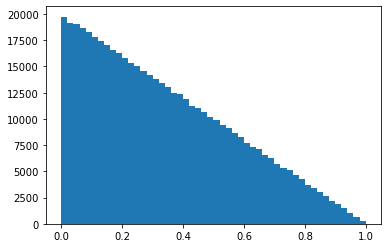

In [40]:
plt1 = plt.hist([x for x, y in zip(X, Y) if y == 0], bins=50)

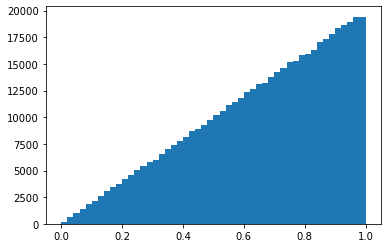

In [41]:
plt2 = plt.hist([x for x, y in zip(X, Y) if y == 1], bins=50)

### 1.2 Classification by Thresholding

In [42]:
def fA(X,x_t):
    return int(X >= x_t)

def fB(X,x_t):
    return int(X < x_t)

In [43]:
def test(M, t, f):
    errors = []
    for i in range(10):
        X, Y = create_data(M)

        predictions = [f(x, t) for x in X]
        wrong_prediction = [p != y for p, y in zip(predictions, Y)]
        
        error = sum(wrong_prediction) / len(X)

        errors.append(error)
    return errors

<span style="color:green;font-weight:bold">
The sample solution returns the error as percent, we return the error in [0, 1]
</span>

In [44]:
def mean_error(error_rates):
    return sum(error_rates) / len(error_rates)

def standard_deviation_error(mean_error, error_rates):
    return sum([abs(mean_error - elem) for elem in error_rates]) / len(error_rates)

In [45]:
TEST_DATA_SIZES = [10, 100, 1000, 10_000]

def experiment(threshold, f):
    test_results = [test(size, threshold, f) for size in TEST_DATA_SIZES]
    mean_errors = [mean_error(result) for result in test_results]
    std_deviations = [standard_deviation_error(mean_error, result) 
                          for mean_error, result in zip(mean_errors, test_results)]
    
    plt.plot(TEST_DATA_SIZES, mean_errors, label="t = "+str(threshold))
    plt.errorbar(TEST_DATA_SIZES, mean_errors, yerr=std_deviations, ecolor="red" ,ls="None")
    plt.legend(loc="lower right")
    plt.xscale("log")

<span style="color:green;font-weight:bold">

The sample solution plotted the mean error rate in relation to the threshold whereas we plotted the mean error rate in relation to the test size as required by the exercise ("i.e. mean error with corresponding error bars as a function of test set size"). Instead of generating an additional plot for the standard deviation of the error as in the sample solution, we included the values as error bars which better visualizes the meaning of the standard deviation of the error rate.

We did not add plots for Rule B.

</span>

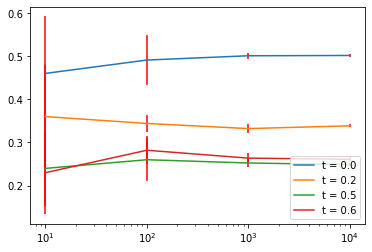

In [46]:
experiment(0.0, fA)
experiment(0.2, fA)
experiment(0.5, fA)
experiment(0.6, fA)

Theoretical error rates:
$$p(error|A;x_{t}) = \frac{1}{4} + (x_{t} - \frac{1}{2})^{2}$$
$$p(error|A;0.0) = \frac{1}{4} + (0.0 - \frac{1}{2})^{2} = 0.5$$
$$p(error|A;0.2) = \frac{1}{4} + (0.2 - \frac{1}{2})^{2} = 0.34$$
$$p(error|A;0.5) = \frac{1}{4} + (0.5 - \frac{1}{2})^{2} = 0.25$$
$$p(error|A;0.6) = \frac{1}{4} + (0.6 - \frac{1}{2})^{2} = 0.26$$

The error standard deviation decreases exponentially with increasing M.
If one compares the expected error rates with the computed error rates, one can see that they are equal for $ M \to \infty $.


### 1.3 Baseline Classifiers

<span style="color:green;font-weight:bold">

Our plots look similar but the solution is rather different since we use only numpy while the sample solution uses pandas. Using the built-in mean and std-deviation function would've been a smart move.

</span>

In [47]:
def fC(X,t):
    r = random.random()
    u = 1 if r >= 0.5 else 0
    return u

def fD(X,t):
    return 1

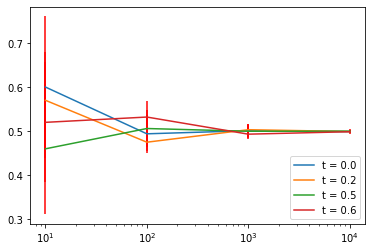

In [48]:
experiment(0.0, fC)
experiment(0.2, fC)
experiment(0.5, fC)
experiment(0.6, fC)

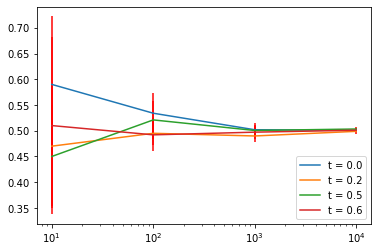

In [49]:
experiment(0.0, fD)
experiment(0.2, fD)
experiment(0.5, fD)
experiment(0.6, fD)

### 1.4 Nearest Neighbor Classification

<span style="color:green;font-weight:bold">
Our version of nearest neighbor looks rather similar although a fully vectorized solution would've been preferable. The computed error is the same but we don't show the std deviation which is a nice information to have.
</span>

In [50]:
def toy_nearest_neighbor_singular(X, Xtrain, Ytrain):
    diff = np.array(list(map(lambda elem: abs(X - elem), Xtrain)))
    smallestElemIndex = np.argmin(diff)
    Y = Ytrain[smallestElemIndex]
    return Y 

def toy_nearest_neighbor(Xtest, Xtrain, Ytrain):
    Ytest = list(map(lambda elem: toy_nearest_neighbor_singular(elem, Xtrain, Ytrain), Xtest))
    return Ytest

In [51]:
def testNNC(N, M):
    Xtrain, Ytrain = create_data(N)
    Xtest, Ytest = create_data(M)

    predictions = toy_nearest_neighbor(Xtest, Xtrain, Ytrain)

    errors = sum([p != y for p, y in zip(predictions, Ytest)])
    error_rate = errors / len(Ytest)
    return error_rate

In [52]:
def experimentNCC(WDH, N, M):
    error_rates = []
    for i in range(WDH):
        error_rate = testNNC(N, M)
        error_rates.append(error_rate)
    return sum(error_rates) / len(error_rates)

In [53]:
experimentNCC(100, 2, 100)

0.4290999999999998

In [54]:
experimentNCC(100, 100, 100)

0.33480000000000004